In [ ]:
import torch, platform
print("PyTorch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
else:
    print("Running on CPU")

PyTorch: 2.8.0+cu126
CUDA available: False
Running on CPU


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

PROJECT_DIR = "/content/drive/MyDrive/Emotional_Face"  # <- change if you want
!mkdir -p "$PROJECT_DIR"
%cd "$PROJECT_DIR"
!pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Emotional_Face
/content/drive/MyDrive/Emotional_Face


# New Section

In [ ]:
!pip -q install scikit-learn matplotlib


In [ ]:
import os, glob
print("Here:", os.getcwd())
print("Files:", sorted(os.listdir()))
for f in ["dataset.py","utils.py","model.py","train.py","eval.py","train.csv","val.csv","test.csv"]:
    print(f, "exists:", os.path.exists(f))


Here: /content/drive/MyDrive/Emotional_Face
Files: ['__pycache__', 'classes.json', 'data.csv', 'data_load_test.py', 'data_with_split.csv', 'dataset.py', 'eval.py', 'infer.py', 'majdi.jpg', 'model.py', 'outputs', 'sad.jpg', 'split_data.py', 'test.csv', 'test_image.jpg', 'test_utils.py', 'train.csv', 'train.py', 'utils.py', 'val.csv']
dataset.py exists: True
utils.py exists: True
model.py exists: True
train.py exists: True
eval.py exists: True
train.csv exists: True
val.csv exists: True
test.csv exists: True


In [ ]:
!python train.py





Using device: cpu
Resolved paths:
   /content/drive/MyDrive/Emotional_Face/train.csv exists: True
   /content/drive/MyDrive/Emotional_Face/val.csv exists: True
   /content/drive/MyDrive/Emotional_Face/test.csv exists: True
Data ready: {'num_classes': 5, 'train_len': 17197, 'val_len': 3685, 'test_len': 3686, 'image_size': 224, 'sampler': 'WeightedRandomSampler'}
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
[Epoch 01] Batch 0/538 avg_loss=1.7868 avg_acc=15.62%
[Epoch 01] Batch 50/538 avg_loss=1.3113 avg_acc=46.63%
[Epoch 01] Batch 100/538 avg_loss=1.1960 avg_acc=52.32%
[Epoch 01] Batch 150/538 avg_loss=1.1241 avg_acc=55.57%
[Epoch 01] Batch 200/538 avg_loss=1.0691 avg_acc=58.04%
[Epoch 01] Batch 250/538 avg_loss=1.0209 avg_acc=60.15%
[Epoch 01] Batch 300/538 avg_loss=0.9832 avg_acc=61.86%
[Epoch 01] Batch 350/538 

In [ ]:
!python eval.py

Device: cuda
Figure(600x400)
Figure(600x400)
Saved plots:
  /content/drive/MyDrive/Emotional_Face/outputs/acc_curve.png
  /content/drive/MyDrive/Emotional_Face/outputs/loss_curve.png
Test samples: 3686 | num_classes: 5
Loaded checkpoint: /content/drive/MyDrive/Emotional_Face/outputs/best_model.pth

Test results:
- loss: 0.5965
- acc : 80.44%

Confusion matrix (rows=true, cols=pred):
           anger  disgust  sad  happiness  surprise
anger        511       20  137         25        50
disgust       16       56    6          2         2
sad          135        8  695         46        28
happiness     55        0   48       1153        93
surprise      18        0   17         15       550

Sample predictions (first 5):
  #00 | true=sad  pred=sad  conf=99.5%
  #01 | true=anger  pred=sad  conf=39.4%
  #02 | true=surprise  pred=surprise  conf=99.3%
  #03 | true=sad  pred=anger  conf=62.0%
  #04 | true=surprise  pred=surprise  conf=99.0%


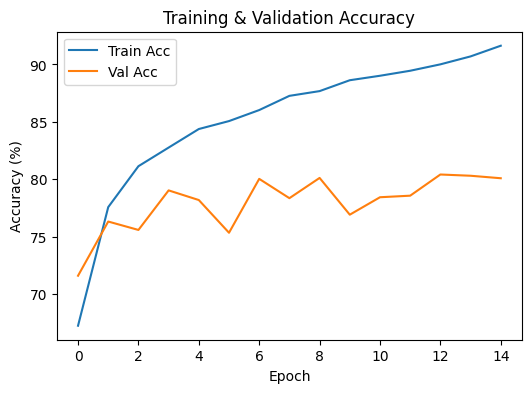

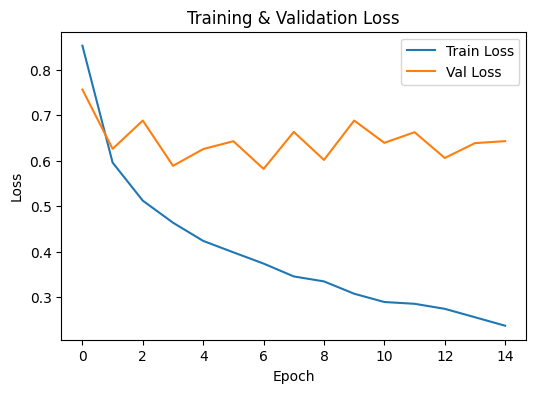

In [ ]:
from IPython.display import Image, display
display(Image(filename="outputs/acc_curve.png"))
display(Image(filename="outputs/loss_curve.png"))


In [ ]:
%run infer.py --index 97



In [1]:
%run infer.py --image "/content/drive/MyDrive/Emotional_Face/majdi.jpg"

Exception: File `'infer.py'` not found.

In [ ]:
%run infer.py --image "/content/drive/MyDrive/Emotional_Face/sad.jpg"